# 3 MINIPROJECT

In [34]:
import pandas as pd
import warnings

In [35]:
warnings.filterwarnings('ignore')

#### Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [4]:
logs = pd.read_csv('logs.csv')
user_data = pd.read_csv('user_data.csv')

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [7]:
user_data.head()

client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49

In [8]:
logs.head()

client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

#### Какой клиент совершил больше всего успешных операций?

In [10]:
successfull_operation = logs.query("success == True")\
    .groupby('client') \
    .agg({'platform': 'count'}) \
    .rename(columns = {'platform': 'successfull_operation'}) \
    .reset_index() \
    .sort_values(by = 'successfull_operation', ascending = False)

max_value = successfull_operation.successfull_operation.max()
max_value

41

In [11]:

best_successfull_operation = successfull_operation.query('successfull_operation == @max_value') \
     .sort_values(by = 'client')\
     .client \
     .tolist()
best_successfull_operation

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

#### С какой платформы осуществляется наибольшее количество успешных операций?


In [18]:
platforms_by_success_oper  =  logs.query("success == True") \
                                    .groupby('platform') \
                                    .agg({'client': 'count'}) \
                                    .reset_index() \
                                    .rename(columns = {'client': 'number_of_success_oper'}) \
                                    .sort_values(by = 'number_of_success_oper', ascending = False) 

platforms_by_success_oper.loc[platforms_by_success_oper.number_of_success_oper.idxmax()]

platform                  phone
number_of_success_oper     2019
Name: 1, dtype: object

#### Какую платформу предпочитают премиумные клиенты?


In [21]:
merged_df = logs.merge(user_data, on = 'client')
merged_df.head()

client  success  platform        time  premium  age
0   61468     True     phone  1585425658    False   25
1   35604    False     phone  1585459894     True   65
2   10931     True  computer  1585468629    False   28
3   41928     True     phone  1585446772    False   46
4   48925     True     phone  1585467880    False   33

In [34]:
 merged_df.query("premium == True") \
            .groupby('platform') \
            .agg({'client': 'count'}) \
            .reset_index() \
            .rename(columns = {'client': 'number_of_premium_users'}) \
            .sort_values(by = 'number_of_premium_users', ascending = False)

platform  number_of_premium_users
1     phone                      246
0  computer                      150
2    tablet                       24

#### Визуализируйте распределение возраста клиентов в зависимости от типа клиента

<Axes: xlabel='premium', ylabel='client'>

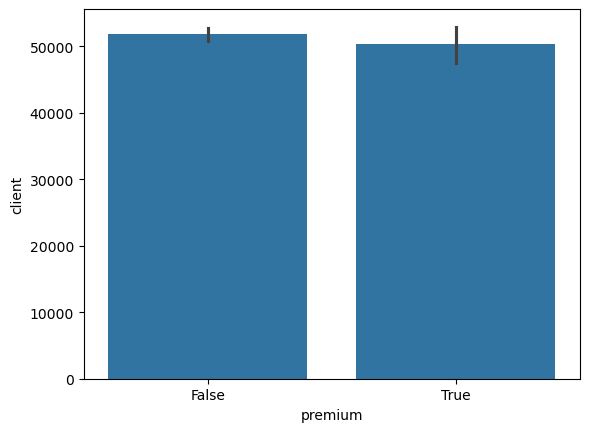

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(merged_df, x = 'premium', y = 'client', legend = True)

# 4 Assignments

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('taxi_peru.csv',sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  source            22988 non-null  object

In [4]:
df['start_at'] = pd.to_datetime(df.start_at)
df['end_at'] = pd.to_datetime(df.end_at)
df['arrived_at'] = pd.to_datetime(df.arrived_at)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [6]:
df.shape

(23111, 19)

In [7]:
df = df.query("start_type == 'asap' or start_type == 'reserved'")

In [8]:
df.shape

(23091, 19)

In [9]:
df['wait_time'] = (df.arrived_at - df.start_at).dt.total_seconds() / 60


In [10]:
df['wait_time']

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23091, dtype: float64

In [11]:
the_latest_driver = df.query("start_type == 'reserved' and wait_time > 0") \
    .groupby('driver_id') \
    .agg({'end_lat': 'count'}) \
    .reset_index() \
    .rename(columns = {'end_lat': 'times_late'}) \
    .sort_values(by = 'times_late', ascending = False) \
    .head(1)

the_latest_driver

driver_id  times_late
24  406921adcca37705ef527b4246c0cfea          67

In [12]:
df['month'] = df.start_at.dt.month
df['weekday'] = df.start_at.dt.day_name()

In [13]:
asd = df.groupby('month') \
    .agg({'end_lat': 'count'}) \
    .rename(columns = {'end_lat': 'number_of_orders'}) \
    .reset_index() \
    .sort_values(by = 'number_of_orders', ascending = False)

In [14]:
import seaborn as sns

<Axes: xlabel='month', ylabel='count'>

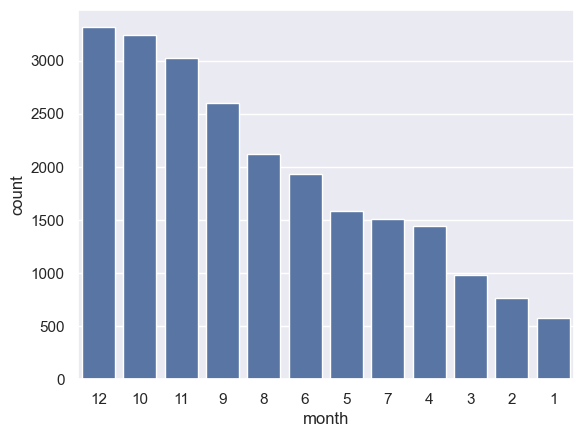

In [24]:
sns.set(style='darkgrid')
sns.countplot(x = df['month'], order = df['month'].value_counts().index)

<Axes: xlabel='weekday', ylabel='count'>

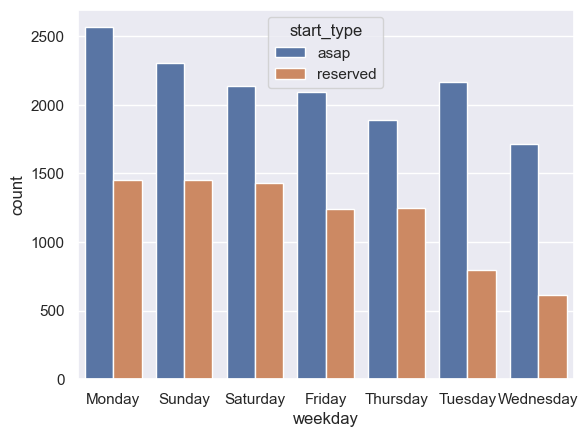

In [26]:
sns.set(style='darkgrid')
sns.countplot(x = 'weekday', data = df, hue = 'start_type', order = df['weekday'].value_counts().index)

# 4 MINIPROJECT

In [13]:
import pandas as pd
import os

#### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), 

#### а также имя пользователя (name),    и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [ ]:
path = "D:/IT/Твой путь в мир Data Analytics - 2023/1_Твой_путь_в_мир_Data_Analytics_Части_1_2_/4/Задания/Минипроект/data/data/"
os.listdir(path)

In [219]:
df = pd.DataFrame()

for current_path, b, c in os.walk(path):
    for i in c:
        dd = current_path + '/' + i
        temp_df = pd.read_csv(dd)
        

        splitting = dd.split('/')
        ss = splitting[-2]
        date, name = ss.split("\\")

        temp_df['name'] = name
        temp_df['date'] = date


        df = pd.concat([df,temp_df])
        
        print(df.shape)

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [141]:
df.shape

(161, 5)

In [209]:
df.reset_index(inplace = True)

In [143]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [144]:
df.head()

index  product_id  quantity            name        date
0      0          47         1  Alexey_Smirnov  2020-12-03
1      1          57         1  Alexey_Smirnov  2020-12-03
2      2          14         2  Alexey_Smirnov  2020-12-03
3      3          52         1  Alexey_Smirnov  2020-12-03
4      4           1         4  Alexey_Smirnov  2020-12-03

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       161 non-null    int64 
 1   product_id  161 non-null    int64 
 2   quantity    161 non-null    int64 
 3   name        161 non-null    object
 4   date        161 non-null    object
dtypes: int64(3), object(2)
memory usage: 6.4+ KB


In [146]:
df['date'] = pd.to_datetime(date)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       161 non-null    int64         
 1   product_id  161 non-null    int64         
 2   quantity    161 non-null    int64         
 3   name        161 non-null    object        
 4   date        161 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.4+ KB


In [148]:
df.head()

index  product_id  quantity            name       date
0      0          47         1  Alexey_Smirnov 2020-12-09
1      1          57         1  Alexey_Smirnov 2020-12-09
2      2          14         2  Alexey_Smirnov 2020-12-09
3      3          52         1  Alexey_Smirnov 2020-12-09
4      4           1         4  Alexey_Smirnov 2020-12-09

#### Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.


In [217]:
max_value = df.groupby('name') \
                .agg({'quantity': 'sum'}) \
                .reset_index() \
                .sort_values(by = ['quantity','name'], ascending = [False,True]) \
                .quantity.max()

most_products = df.groupby('name') \
                    .agg({'quantity': 'sum'}) \
                    .query("quantity == @max_value") \
                    .index

In [218]:
names_of_most_products = list(a)
names_of_most_products

['Alexey_Smirnov', 'Petr_Smirnov']

#### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


C:\Users\Фархат\AppData\Local\Temp\ipykernel_9564\2964607563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_products,


<Axes: xlabel='product_id', ylabel='quantity'>

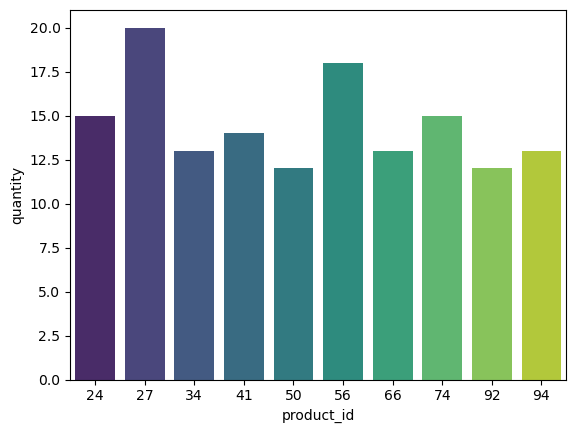

In [215]:
import seaborn as sns
top_10_products = df.groupby('product_id') \
                    .agg({'quantity': 'sum'}) \
                    .reset_index() \
                    .sort_values(by = 'quantity', ascending = False) \
                    .head(10)

sns.barplot(data = top_10_products, 
            x = 'product_id', 
            y = 'quantity',
            palette = 'viridis')

In [216]:
top_10_products.query("product_id == 56")

product_id  quantity
42          56        18

#### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [213]:
df.groupby(['name', 'product_id']) \
    .agg({'date': pd.Series.nunique, 'quantity': 'sum'}) \
    .query("date > 1")

date  quantity
name         product_id                
Anton_Ivanov 15             2         7
Petr_Fedorov 94             2         8

# 5 Assignments

In [80]:
import pandas as pd

In [81]:
retail = pd.read_csv("data.csv",encoding = 'ISO-8859-1')

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

**InvoiceNo** – номер транзакции

**StockCode** – код товара

**Description** – описание товара

**Quantity** – количество единиц товара, добавленных в заказ

**InvoiceDate** – дата транзакции 

**UnitPrice** – цена за единицу товара

**CustomerID** – id клиента

**Country** – страна, где проживает клиент


In [82]:
retail

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [83]:
retail.shape

(541909, 8)

#### Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.



In [84]:
retail_columns = retail.columns

In [85]:
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [86]:
retail.duplicated().sum()

5268

In [87]:
retail.drop_duplicates(inplace = True)

In [88]:
retail.duplicated().sum()

0

In [89]:
retail.shape

(536641, 8)

In [90]:
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

#### 0Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). 
Сколько всего заказов отменили пользователи?


In [91]:
retail.query("InvoiceNo.str.startswith('C', na=False)") \
        .agg({'InvoiceNo': 'count'}) \
        .rename({'InvoiceNo': 'Canceled'})

Canceled    9251
dtype: int64

#### Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.


In [92]:
retail = retail[retail['Quantity'] > 0]
retail.shape[0]

526054



#### Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.


In [93]:
import numpy as np


In [94]:
germany_customers = retail.query("Country == 'Germany'") \
                          .groupby('CustomerID') \
                          .agg({'InvoiceNo': pd.Series.nunique}) \
                          .rename(columns = {'InvoiceNo': 'number_of_transactions'})

eighty = np.percentile(germany_customers['number_of_transactions'], 80)

id_germany_top_cust = germany_customers.query("number_of_transactions > @eighty") \
                                        .sort_values(by = 'number_of_transactions', ascending = False) \
                                        .index

germany_top = list(id_germany_top_cust)
germany_top

[12569.0,
 12471.0,
 12720.0,
 12621.0,
 12474.0,
 12709.0,
 12712.0,
 12647.0,
 12500.0,
 12476.0,
 12662.0,
 12481.0,
 12600.0,
 12708.0,
 12619.0,
 12626.0,
 12705.0,
 12524.0]

Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.


In [95]:
top_retail_germany = retail.query("CustomerID in @germany_top")
top_retail_germany

InvoiceNo StockCode                          Description  Quantity  \
1109      536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1110      536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
1111      536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
1112      536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
1113      536527     22244           3 HOOK HANGER MAGIC GARDEN        12   
...          ...       ...                                  ...       ...   
541726    581570     22139     RETROSPOT TEA SET CERAMIC 11 PC          3   
541727    581570     23077                  DOUGHNUT LIP GLOSS         20   
541728    581570     20750             RED RETROSPOT MINI CASES         2   
541729    581570     22505            MEMO BOARD COTTAGE DESIGN         4   
541730    581570      POST                              POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID  Country  
1109    12/1/2010 13:04       2.95     12662.0  Germany  
1110    12/1/2010 13:04       2.55     12662.0  Germany  
1111    12/1/2010 13:04       0.85     12662.0  Germany  
1112    12/1/2010 13:04       1.65     12662.0  Germany  
1113    12/1/2010 13:04       1.95     12662.0  Germany  
...                 ...        ...         ...      ...  
541726  12/9/2011 11:59       4.95     12662.0  Germany  
541727  12/9/2011 11:59       1.25     12662.0  Germany  
541728  12/9/2011 11:59       7.95     12662.0  Germany  
541729  12/9/2011 11:59       4.95     12662.0  Germany  
541730  12/9/2011 11:59      18.00     12662.0  Germany  

[4175 rows x 8 columns]

 Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 
Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.


In [98]:
top_retail_germany.groupby('StockCode') \
        .agg({'Description': 'count'}) \
        .reset_index() \
        .sort_values(by = 'Description', ascending = False) \
        .query("StockCode not in 'POST'") \
        .head(1)

StockCode  Description
409     22326           52

Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.


In [104]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [105]:
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom    15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom    22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34

Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)


In [116]:
id_top_orders = retail.groupby('InvoiceNo') \
                        .agg({'Revenue': 'sum'}) \
                        .sort_values(by = 'Revenue',ascending = False) \
                        .head(5) \
                        .index

id_top_orders = list(id_top_orders)
id_top_orders

['581483', '541431', '574941', '576365', '556444']

# 5 MINIPROJECT

In [12]:
import pandas as pd
import seaborn as sns

Имеются следующие данные:

**date** – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)

**name** – имя пользователя

**transaction** – статус транзакции

**minute** – сколько минут прошло с начала дня


In [4]:
transaction_data = pd.read_csv('transaction_data.csv')
transaction_data.head()

date                name  transaction
0  2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1  2020-03-02 00:59:09      Irina_Fedorova  successfull
2  2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3  2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4  2020-03-02 00:17:52      Julia_Smirnova    cancelled

In [5]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
transaction_data.shape

(5315, 3)

In [8]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [9]:
transaction_data.describe()

date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692

#### Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.


In [13]:
transaction_distr = transaction_data.transaction.value_counts()
transaction_distr

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

<Axes: xlabel='transaction', ylabel='count'>

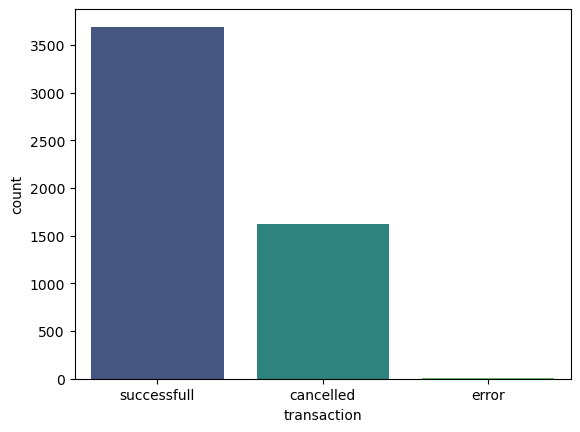

In [19]:
sns.barplot(x = transaction_distr.index, y = transaction_distr, palette = 'viridis')

#### Сколько транзакций завершились ошибкой?

In [20]:
transaction_distr.error

4

#### Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


In [26]:
successfull_transactions = transaction_data.query("transaction == 'successfull'") \
                                            .groupby('name') \
                                            .agg({'date': 'count'}) \
                                            .rename(columns = {'date': 'count'})
successfull_transactions

count
name                      
Ekaterina_Fedorova      72
Ekaterina_Ivanova       59
Ekaterina_Lesnova       63
Ekaterina_Ozerova       72
Ekaterina_Petrova       68
Ekaterina_Polyanova     68
Ekaterina_Smirnova      77
Irina_Fedorova          62
Irina_Ivanova           60
Irina_Lesnova           76
Irina_Ozerova           76
Irina_Petrova           66
Irina_Polyanova         59
Irina_Smirnova          63
Julia_Fedorova          67
Julia_Ivanova           63
Julia_Lesnova           55
Julia_Ozerova           60
Julia_Petrova           74
Julia_Polyanova         61
Julia_Smirnova          67
Lolita_Fedorova         70
Lolita_Ivanova          76
Lolita_Lesnova          52
Lolita_Ozerova          63
Lolita_Petrova          64
Lolita_Polyanova        59
Lolita_Smirnova         65
Masha_Fedorova          69
Masha_Ivanova           73
Masha_Lesnova           63
Masha_Ozerova           80
Masha_Petrova           62
Masha_Polyanova         78
Masha_Smirnova          57
Olga_Fedorova           72
Olga_Ivanova            64
Olga_Lesnova            56
Olga_Ozerova            65
Olga_Petrova            67
Olga_Polyanova          70
Olga_Smirnova           80
Svetlana_Fedorova       67
Svetlana_Ivanova        79
Svetlana_Lesnova        60
Svetlana_Ozerova        62
Svetlana_Petrova        58
Svetlana_Polyanova      78
Svetlana_Smirnova       82
Vasilisa_Fedorova       61
Vasilisa_Ivanova        62
Vasilisa_Lesnova        55
Vasilisa_Ozerova        62
Vasilisa_Petrova        63
Vasilisa_Polyanova      46
Vasilisa_Smirnova       64

<Axes: ylabel='Count'>

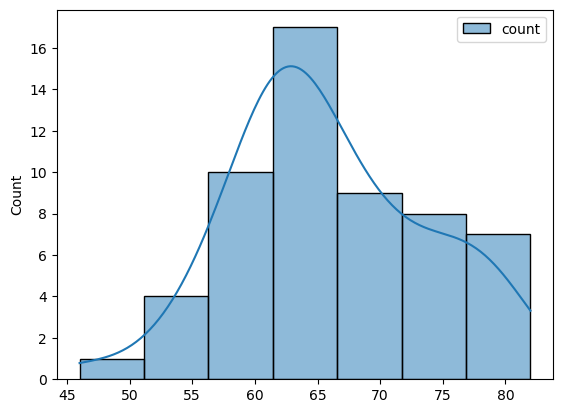

In [25]:
sns.histplot(data = successfull_transactions, kde = True)

#### Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)


In [66]:
transaction_data_updated = pd.read_csv('transaction_data_updated.csv')
transaction_data_updated.head()

date                name  transaction  minute
0  2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1  2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2  2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6
3  2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2
4  2020-03-02 00:17:52      Julia_Smirnova    cancelled      17

#### Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


In [74]:
transactions_minute = transaction_data_updated.groupby(['name','minute'], as_index = False) \
                                                .agg({'transaction': 'count'}) \
                                                .pivot_table(index = 'minute', 
                                                             columns = 'name', 
                                                             values = 'transaction', 
                                                             fill_value = 0, 
                                                             sort = True)

transactions_minute 
                            
                                

name    Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
minute                                                             
0                      3.0                4.0                2.0   
1                      4.0                4.0                0.0   
2                      1.0                2.0                4.0   
3                      3.0                0.0                2.0   
4                      3.0                0.0                0.0   
5                      3.0                0.0                2.0   
6                      4.0                1.0                2.0   
7                      3.0                2.0                1.0   
8                      2.0                4.0                3.0   
9                      2.0                4.0                2.0   
10                     0.0                3.0                3.0   
11                     2.0                3.0                3.0   
12                     4.0                3.0                0.0   
13                     1.0                2.0                2.0   
14                     4.0                2.0                2.0   
15                     3.0                1.0                1.0   
16                     6.0                1.0                2.0   
17                     2.0                3.0                1.0   
18                     3.0                0.0                2.0   
19                     0.0                3.0                3.0   
20                     1.0                2.0                3.0   
21                     0.0                0.0                4.0   
22                     3.0                1.0                1.0   
23                     2.0                5.0                4.0   
24                     2.0                0.0                3.0   
25                     7.0                2.0                2.0   
26                     1.0                1.0                1.0   
27                     5.0                3.0                1.0   
28                     1.0                2.0                0.0   
29                     4.0                0.0                0.0   
30                     0.0                1.0                2.0   
31                     0.0                0.0                0.0   
32                     0.0                1.0                2.0   
33                     0.0                2.0                1.0   
34                     1.0                1.0                0.0   
35                     2.0                0.0                1.0   
36                     0.0                0.0                1.0   
37                     3.0                1.0                2.0   
38                     1.0                2.0                0.0   
39                     0.0                0.0                0.0   
40                     2.0                1.0                0.0   
41                     0.0                3.0                2.0   
42                     2.0                2.0                0.0   
43                     2.0                2.0                2.0   
44                     1.0                0.0                1.0   
45                     2.0                0.0                0.0   
46                     0.0                2.0                2.0   
47                     1.0                1.0                0.0   
48                     2.0                1.0                3.0   
49                     2.0                1.0                0.0   
50                     1.0                0.0                0.0   
51                     1.0                0.0                2.0   
52                     2.0                0.0                2.0   
53                     1.0                0.0                0.0   
54                     2.0                0.0                1.0   
55                     0.0                0.0                3.0   
56                     0.0                0.0           

<Axes: xlabel='minute'>

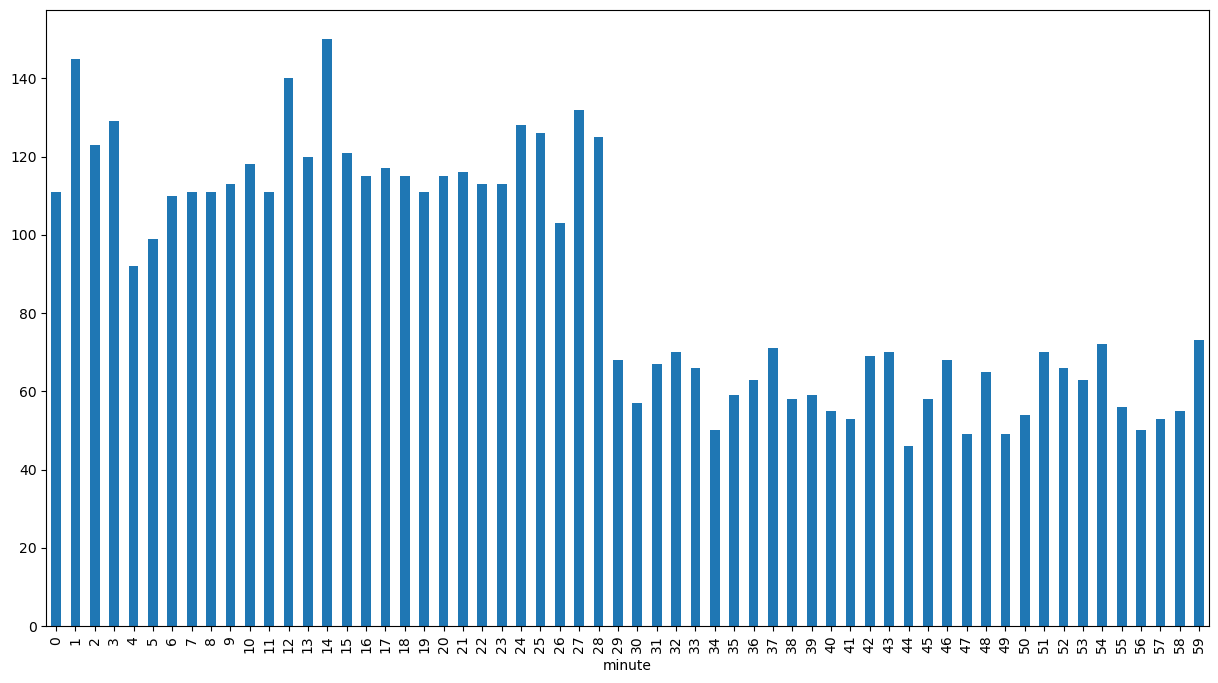

In [75]:
transactions_minute.sum(axis = 1).plot.bar(figsize = (15,8))

In [76]:
transaction_data_updated

date                name  transaction  minute
0     2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1     2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2     2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6
3     2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2
4     2020-03-02 00:17:52      Julia_Smirnova    cancelled      17
...                   ...                 ...          ...     ...
5310  2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9
5311  2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46
5312  2020-03-02 00:16:38      Olga_Polyanova  successfull      16
5313  2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13
5314  2020-03-02 01:15:45      Irina_Fedorova    cancelled      15

[5315 rows x 4 columns]

As you can see there we have 2020-03-02 01:06:14 in the index 2 and it has only 6 minutes while we should have 66 minutes we should fix it

In [77]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])
transaction_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


In [78]:
transaction_data_updated['right_minutes'] = transaction_data_updated.date.dt.hour * 60 + transaction_data_updated.date.dt.minute
transaction_data_updated

date                name  transaction  minute  \
0    2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37   
1    2020-03-02 00:59:09      Irina_Fedorova  successfull      59   
2    2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6   
3    2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2   
4    2020-03-02 00:17:52      Julia_Smirnova    cancelled      17   
...                  ...                 ...          ...     ...   
5310 2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9   
5311 2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46   
5312 2020-03-02 00:16:38      Olga_Polyanova  successfull      16   
5313 2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13   
5314 2020-03-02 01:15:45      Irina_Fedorova    cancelled      15   

      right_minutes  
0                37  
1                59  
2                66  
3                 2  
4                17  
...             ...  
5310              9  
5311             46  
5312             16  
5313             13  
5314             75  

[5315 rows x 5 columns]

In [80]:
transactions_minute = transaction_data_updated.groupby(['name','right_minutes']) \
                                                .agg({'date': 'count'}) \
                                                .pivot_table(index = 'right_minutes', 
                                                             columns = 'name', 
                                                             values = 'date', 
                                                             fill_value = 0, 
                                                             sort = True)

transactions_minute

name           Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
right_minutes                                                             
0                             1.0                3.0                0.0   
1                             1.0                4.0                0.0   
2                             1.0                1.0                2.0   
3                             2.0                0.0                1.0   
4                             2.0                0.0                0.0   
...                           ...                ...                ...   
85                            4.0                0.0                2.0   
86                            0.0                1.0                0.0   
87                            3.0                1.0                0.0   
88                            0.0                1.0                0.0   
89                            0.0                0.0                0.0   

name           Ekaterina_Ozerova  Ekaterina_Petrova  Ekaterina_Polyanova  \
right_minutes                                                              
0                            1.0                3.0                  3.0   
1                            3.0                2.0                  1.0   
2                            3.0                1.0                  0.0   
3                            0.0                3.0                  1.0   
4                            2.0                1.0                  1.0   
...                          ...                ...                  ...   
85                           1.0                1.0                  1.0   
86                           0.0                2.0                  1.0   
87                           2.0                2.0                  3.0   
88                           1.0                1.0                  0.0   
89                           0.0                0.0                  0.0   

name           Ekaterina_Smirnova  Irina_Fedorova  Irina_Ivanova  \
right_minutes                                                      
0                             2.0             1.0            1.0   
1                             3.0             1.0            2.0   
2                             2.0             1.0            1.0   
3                             1.0             2.0            1.0   
4                             1.0             3.0            1.0   
...                           ...             ...            ...   
85                            0.0             1.0            0.0   
86                            2.0             1.0            0.0   
87                            0.0             0.0            0.0   
88                            1.0             4.0            1.0   
89                            0.0             0.0            0.0   

name           Irina_Lesnova  ...  Svetlana_Petrova  Svetlana_Polyanova  \
right_minutes                 ...                                         
0                        1.0  ...               0.0                 2.0   
1                        0.0  ...               2.0                 4.0   
2                        2.0  ...               2.0                 0.0   
3                        1.0  ...               0.0                 2.0   
4                        0.0  ...               1.0                 1.0   
...                      ...  ...               ...                 ...   
85                       0.0  ...               2.0                 2.0   
86                       1.0  ...               0.0                 0.0   
87                       0.0  ...               1.0                 1.0   
88                       2.0  ...               1.0                 1.0   
89                       0.0  ...               0.0                 0.0   

name           Svetlana_Smirnova  Vasilisa_Fedorova  Vasilisa_Ivanova  \
right_minutes                                                           
0                           

<Axes: xlabel='right_minutes'>

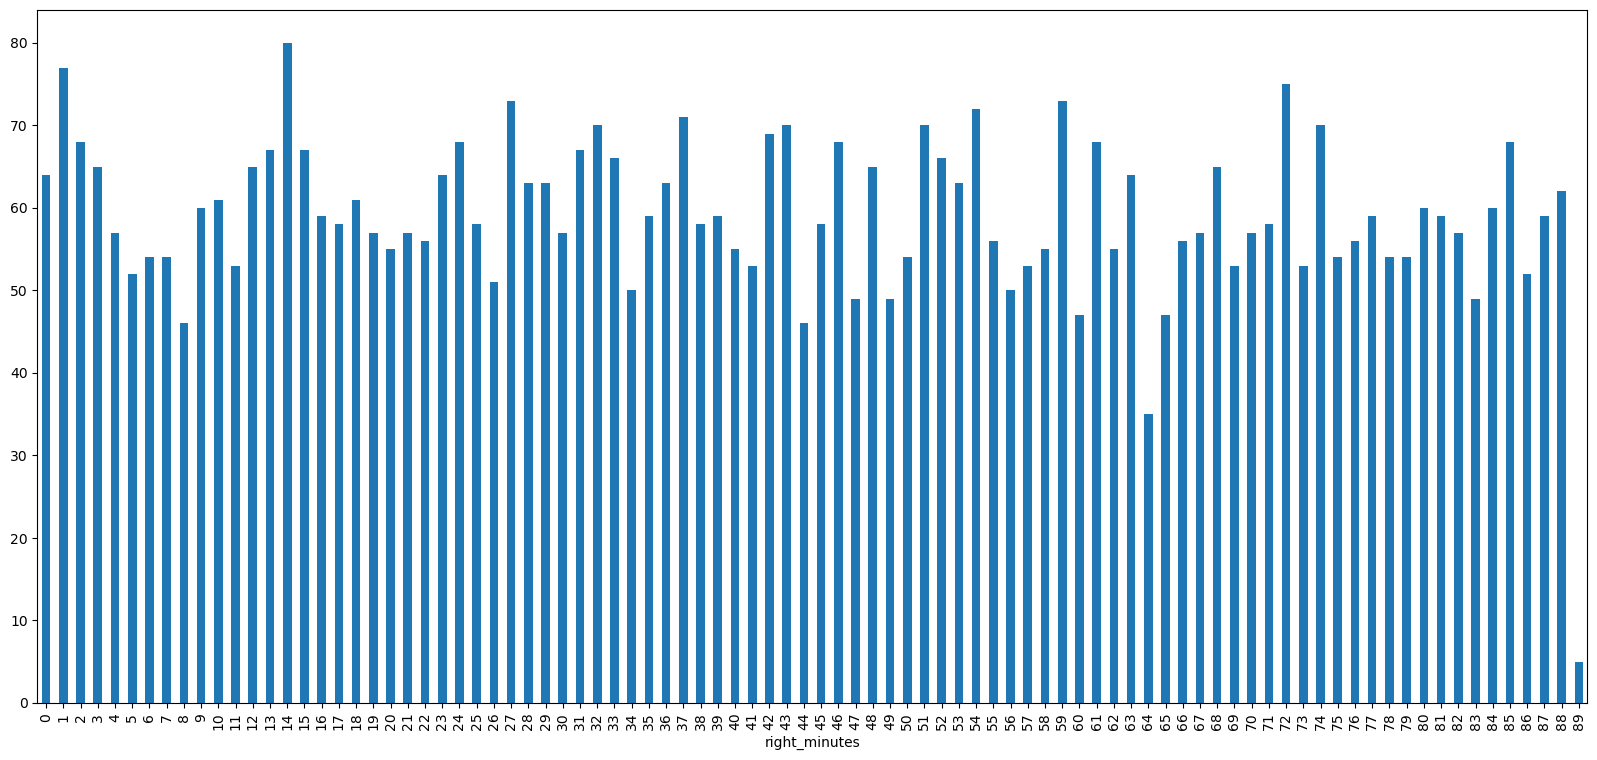

In [81]:
transactions_minute.sum(axis = 1).plot.bar(figsize = (20,9))

# 6 Assignments

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
avocado = pd.read_csv('avocado_mean.csv', parse_dates = ['Date'], index_col = 'Date' )
avocado.head()

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037

In [107]:
avocado.shape

(169, 1)

#### Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.


In [108]:
avg_rolling_price_avoc = avocado.AveragePrice.rolling(3, min_periods = 1).mean()
print(avg_rolling_price_avoc)
print(f'\n\nMaximum value of Average rolling price of avocado is {avg_rolling_price_avoc.max()}')

Date
2015-01-04    1.301296
2015-01-11    1.335972
2015-01-18    1.354352
2015-01-25    1.386296
2015-02-01    1.345093
                ...   
2018-02-25    1.346914
2018-03-04    1.361296
2018-03-11    1.348302
2018-03-18    1.332994
2018-03-25    1.331883
Name: AveragePrice, Length: 169, dtype: float64


Maximum value of Average rolling price of avocado is 1.8493209876543208


#### Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
#### Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50)

In [125]:
avg_rolling2_price_avoc = avocado.rolling(2).mean()


avg_rolling4_price_avoc = avocado.rolling(4).mean()


avg_rolling10_price_avoc = avocado.rolling(10).mean()


avg_rolling50_price_avoc = avocado.rolling(50).mean()



<Axes: xlabel='Date', ylabel='AveragePrice'>

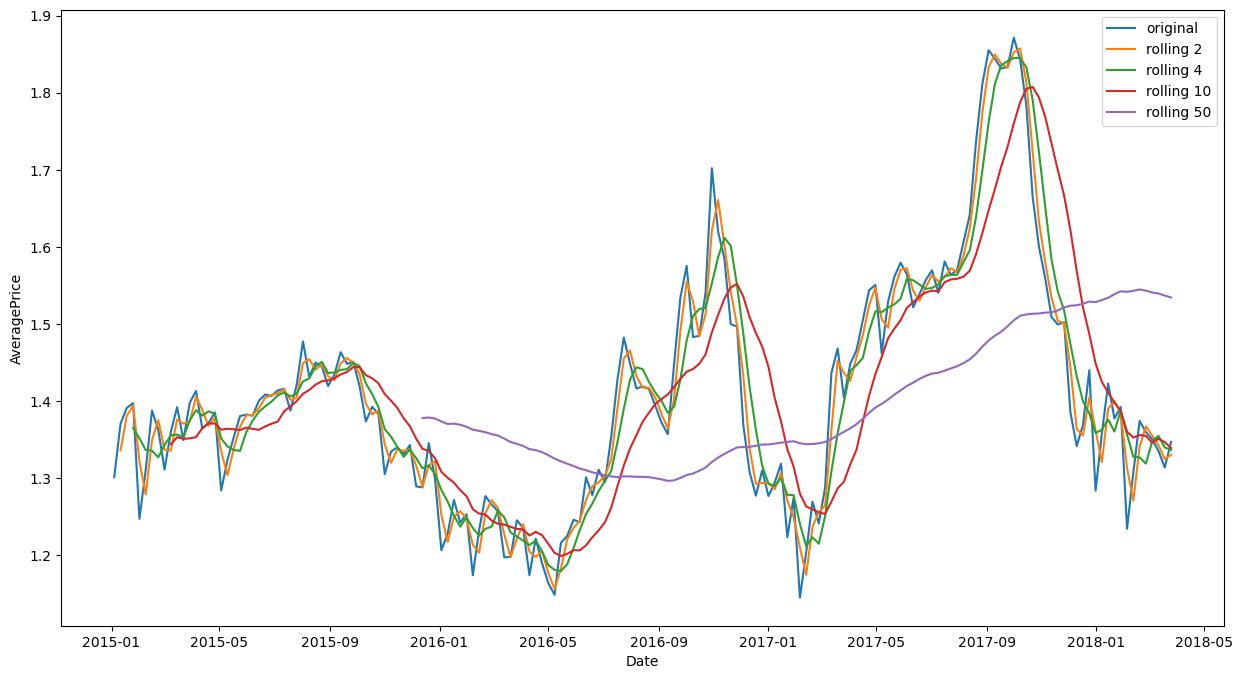

In [127]:
plt.figure(figsize = (15,8))
sns.lineplot(x = avocado.index, y = avocado.AveragePrice, label = 'original')
sns.lineplot(x = avg_rolling2_price_avoc.index, y = avg_rolling2_price_avoc.AveragePrice, label = 'rolling 2')
sns.lineplot(x = avg_rolling4_price_avoc.index, y = avg_rolling4_price_avoc.AveragePrice, label = 'rolling 4')
sns.lineplot(x = avg_rolling10_price_avoc.index, y = avg_rolling10_price_avoc.AveragePrice, label = 'rolling 10')
sns.lineplot(x = avg_rolling50_price_avoc.index, y = avg_rolling50_price_avoc.AveragePrice, label = 'rolling 50')


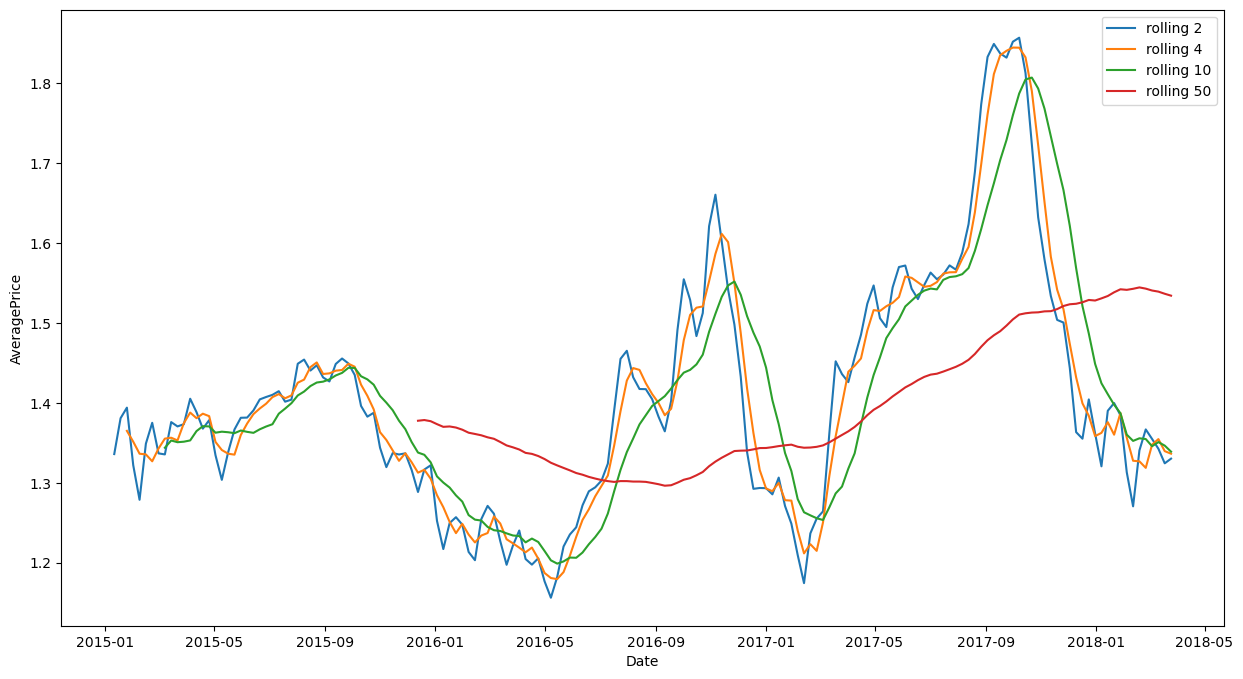

In [135]:
windows = [2,4,10,50]
plt.figure(figsize = (15,8))
for window in windows:
    avr = avocado.rolling(window).mean()
    sns.lineplot(x = avr.index, y = avr.AveragePrice, label = f'rolling {window}')

In [137]:
avocado.ewm(span = 2).mean()

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.353310
2015-01-18      1.379480
2015-01-25      1.391394
2015-02-01      1.294758
...                  ...
2018-02-25      1.356212
2018-03-04      1.352194
2018-03-11      1.340793
2018-03-18      1.322734
2018-03-25      1.338812

[169 rows x 1 columns]

In [140]:
avocado.expanding().mean()

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.335972
2015-01-18      1.354352
2015-01-25      1.365046
2015-02-01      1.341444
...                  ...
2018-02-25      1.407673
2018-03-04      1.407327
2018-03-11      1.406894
2018-03-18      1.406340
2018-03-25      1.405988

[169 rows x 1 columns]

In [145]:
av_full = pd.read_csv('avocado_full.csv', index_col = 0)
av_full

AveragePrice  Total Volume        4046       4225       4770  \
Date                                                                       
2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
2015-01-04          1.68       2896.72      161.68     206.96       0.00   
2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
...                  ...           ...         ...        ...        ...   
2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36         0.00       organic   
2015-01-04      905.55      905.55        0.00         0.00       organic   
2015-01-04     2528.08     2528.08        0.00         0.00       organic   
2015-01-04    14925.18    11264.80     3660.38         0.00  conventional   
2015-01-04      374.35      186.67      187.68         0.00       organic   
...                ...         ...         ...          ...           ...   
2018-03-25   127409.04   103579.41    22467.04      1362.59  conventional   
2018-03-25  4014132.29  3398569.92   546409.74     69152.63  conventional   
2018-03-25   129163.36   109052.26    20111.10         0.00       organic   
2018-03-25    89631.19    89424.11      207.08         0.00       organic   
2018-03-25   801373.63   774634.09    23833.93      2905.61  conventional   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise  
...          ...                 ...  
2018-03-25  2018             Chicago  
2018-03-25  2018        SouthCentral  
2018-03-25  2018        SouthCentral  
2018-03-25  2018          California  
2018-03-25  2018             NewYork  

[18249 rows x 12 columns]

In [178]:
organic_chicago = av_full.query("type == 'organic' and region == 'Chicago'")

organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean().round(2)
organic_chicago['emw'] = organic_chicago.AveragePrice.ewm(span = 4).mean().round(2)

<Axes: xlabel='Date'>

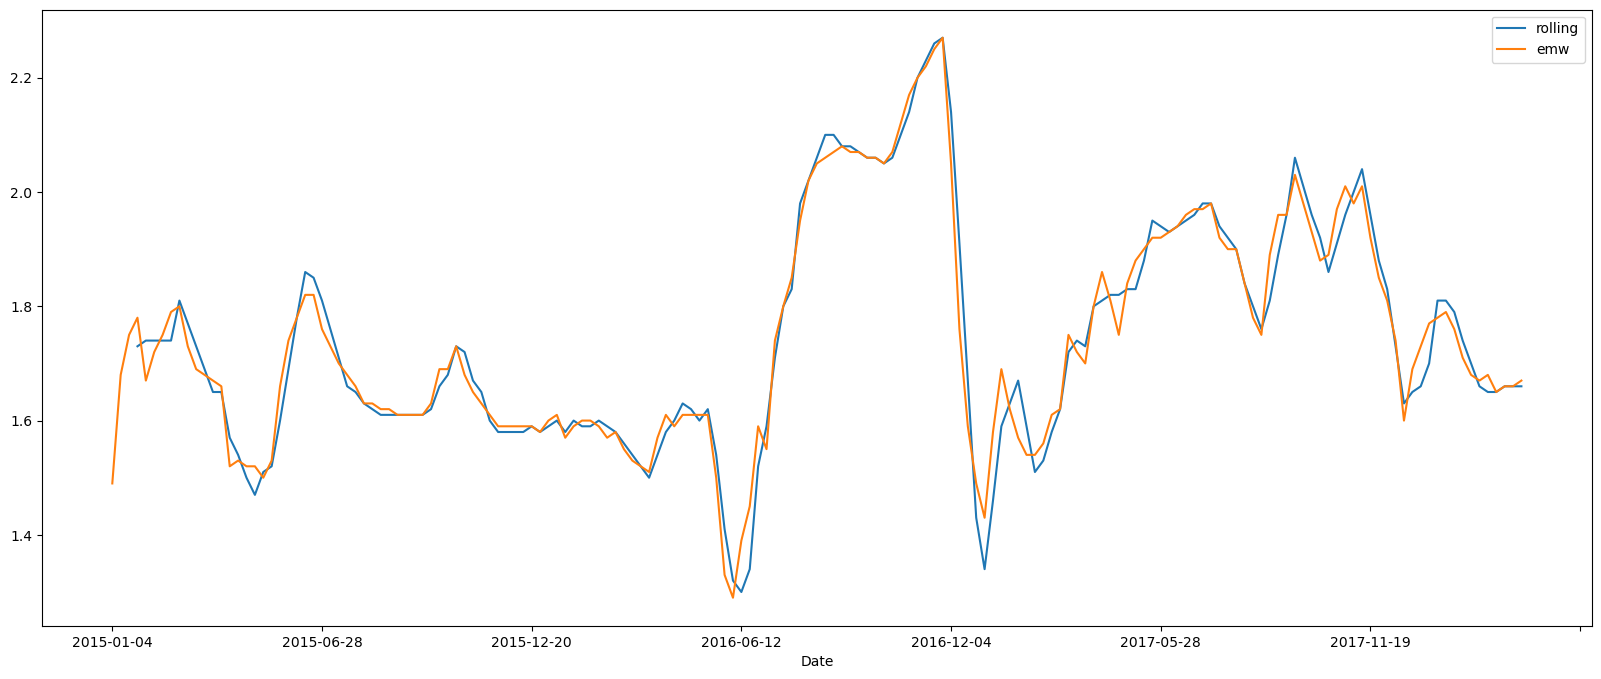

In [180]:
organic_chicago[['rolling','emw']].plot(figsize = (20,8))

In [182]:
delay = pd.read_csv('delays.csv')
delay

client_id  company_id                        delay  revenue
0         2389        4240  -1 days -14:57:48.000000000   705436
1         7614        9544  -4 days -02:14:23.000000000   859266
2         2052        2427  -0 days -06:08:57.000000000   812416
3         9635        8054  -0 days -23:40:19.000000000   162312
4         8154        5503  -1 days -13:21:53.000000000   658844
..         ...         ...                          ...      ...
259       5837        2617  -0 days -05:32:08.000000000   602129
260       2384        2364  -3 days -23:27:14.000000000   910660
261       5146        3331  -1 days -15:22:34.000000000   401137
262       7203        5532  -2 days -17:15:02.000000000   308979
263       3822        9882  -1 days -15:50:29.000000000   877773

[264 rows x 4 columns]

#### Cначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -

In [187]:
delay['delay'] = delay['delay'].str.replace('-', '')
delay['delay'] = pd.to_timedelta(delay['delay'])

In [188]:
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   client_id   264 non-null    int64          
 1   company_id  264 non-null    int64          
 2   delay       264 non-null    timedelta64[ns]
 3   revenue     264 non-null    int64          
dtypes: int64(3), timedelta64[ns](1)
memory usage: 8.4 KB


In [189]:
delay

client_id  company_id           delay  revenue
0         2389        4240 1 days 14:57:48   705436
1         7614        9544 4 days 02:14:23   859266
2         2052        2427 0 days 06:08:57   812416
3         9635        8054 0 days 23:40:19   162312
4         8154        5503 1 days 13:21:53   658844
..         ...         ...             ...      ...
259       5837        2617 0 days 05:32:08   602129
260       2384        2364 3 days 23:27:14   910660
261       5146        3331 1 days 15:22:34   401137
262       7203        5532 2 days 17:15:02   308979
263       3822        9882 1 days 15:50:29   877773

[264 rows x 4 columns]

#### Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical

In [192]:
delay['delay_categorical'] = pd.cut(delay.delay, bins = 3)
delay

client_id  company_id           delay  revenue  \
0         2389        4240 1 days 14:57:48   705436   
1         7614        9544 4 days 02:14:23   859266   
2         2052        2427 0 days 06:08:57   812416   
3         9635        8054 0 days 23:40:19   162312   
4         8154        5503 1 days 13:21:53   658844   
..         ...         ...             ...      ...   
259       5837        2617 0 days 05:32:08   602129   
260       2384        2364 3 days 23:27:14   910660   
261       5146        3331 1 days 15:22:34   401137   
262       7203        5532 2 days 17:15:02   308979   
263       3822        9882 1 days 15:50:29   877773   

                                     delay_categorical  
0    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
1         (3 days 08:05:36.333333333, 4 days 23:51:14]  
2    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
3    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
4    (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
..                                                 ...  
259  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
260       (3 days 08:05:36.333333333, 4 days 23:51:14]  
261  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
262  (1 days 16:19:58.666666666, 3 days 08:05:36.33...  
263  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  

[264 rows x 5 columns]

#### Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия.

In [195]:
# I need to know what is the maximum amount of seconds there for it to be the boundary

delay['delay'].dt.total_seconds().max()

431474.0

In [200]:
# 86400 seconds = 1 day
# 172800 seconds = 2 day
# 259200 seconds = 3 day


intervals = [0, 86400, 172800, 259200, 400000]
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

delay['delay_categorical'] = pd.cut(delay['delay'].dt.total_seconds(), bins = intervals, labels = labels)
delay

client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436          1-2 days
1         7614        9544 4 days 02:14:23   859266  more than 3 days
2         2052        2427 0 days 06:08:57   812416   less than 1 day
3         9635        8054 0 days 23:40:19   162312   less than 1 day
4         8154        5503 1 days 13:21:53   658844          1-2 days
..         ...         ...             ...      ...               ...
259       5837        2617 0 days 05:32:08   602129   less than 1 day
260       2384        2364 3 days 23:27:14   910660  more than 3 days
261       5146        3331 1 days 15:22:34   401137          1-2 days
262       7203        5532 2 days 17:15:02   308979          2-3 days
263       3822        9882 1 days 15:50:29   877773          1-2 days

[264 rows x 5 columns]

Text(0.5, 1.0, 'How often are transactions delayed?')

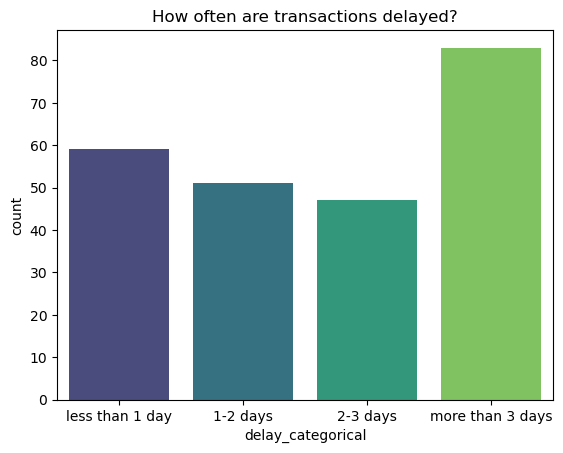

In [232]:
sns.countplot(x = delay.delay_categorical, palette = 'viridis')
plt.title('How often are transactions delayed?')

# 6 MINIPROJECT

In [2]:
import pandas as pd
ads = pd.read_csv('ads_data.csv')
ads.head()

date                 time event platform   ad_id  client_union_id  \
0  2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1  2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2  2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3  2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4  2019-04-01  2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

In [3]:
ads.shape

(1000000, 11)

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   date                   1000000 non-null  object 
 1   time                   1000000 non-null  object 
 2   event                  1000000 non-null  object 
 3   platform               1000000 non-null  object 
 4   ad_id                  1000000 non-null  int64  
 5   client_union_id        1000000 non-null  int64  
 6   campaign_union_id      1000000 non-null  int64  
 7   ad_cost_type           1000000 non-null  object 
 8   ad_cost                1000000 non-null  float64
 9   has_video              1000000 non-null  int64  
 10  target_audience_count  1000000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 83.9+ MB


#### Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).


In [5]:
event_per_ad = ads.groupby(['ad_id', 'event'], as_index = False) \
                    .agg({'date': 'count'}) \
                    .rename(columns = {'date': 'event_number'})

pivot_event_per_ad = event_per_ad.pivot_table(index = 'ad_id', columns = 'event', values = 'event_number').fillna(1)
pivot_event_per_ad

event   click   view
ad_id               
2         1.0  101.0
3         3.0  184.0
1902      1.0   41.0
2064      1.0   35.0
2132      1.0   58.0
...       ...    ...
122004    4.0  100.0
122013    1.0  156.0
122023    1.0   68.0
122031    1.0  138.0
122078    1.0   42.0

[965 rows x 2 columns]

In [6]:
pivot_event_per_ad.mean().round(0)

event
click    114.0
view     923.0
dtype: float64

In [7]:
pivot_event_per_ad.view.describe()

count       965.000000
mean        923.140933
std       12945.944930
min           1.000000
25%          35.000000
50%          82.000000
75%         208.000000
max      351802.000000
Name: view, dtype: float64

#### Нарисуйте график распределения показов на объявление за весь период.


C:\Users\Фархат\AppData\Local\Temp\ipykernel_13744\3055759634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_event_per_ad.view)


<Axes: xlabel='view', ylabel='Density'>

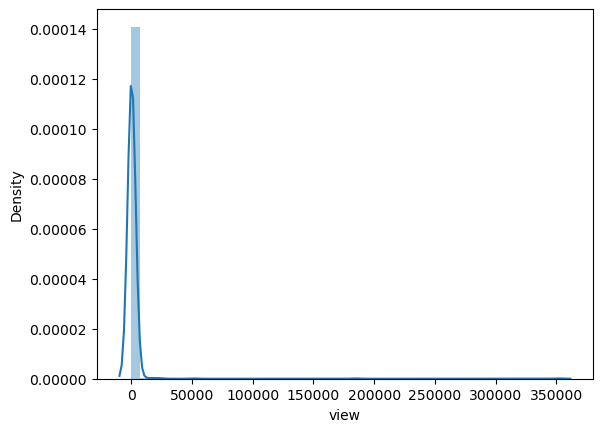

In [9]:
import seaborn as sns
sns.distplot(pivot_event_per_ad.view)

In [10]:
import numpy as np

In [11]:
view_per_ad = pivot_event_per_ad[['view']]
view_per_ad

event    view
ad_id        
2       101.0
3       184.0
1902     41.0
2064     35.0
2132     58.0
...       ...
122004  100.0
122013  156.0
122023   68.0
122031  138.0
122078   42.0

[965 rows x 1 columns]

In [12]:
view_per_ad['log_view'] = np.log(view_per_ad)
view_per_ad['log_view']

ad_id
2         4.615121
3         5.214936
1902      3.713572
2064      3.555348
2132      4.060443
            ...   
122004    4.605170
122013    5.049856
122023    4.219508
122031    4.927254
122078    3.737670
Name: log_view, Length: 965, dtype: float64

C:\Users\Фархат\AppData\Local\Temp\ipykernel_13744\2826226901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_per_ad['log_view'])


<Axes: xlabel='log_view', ylabel='Density'>

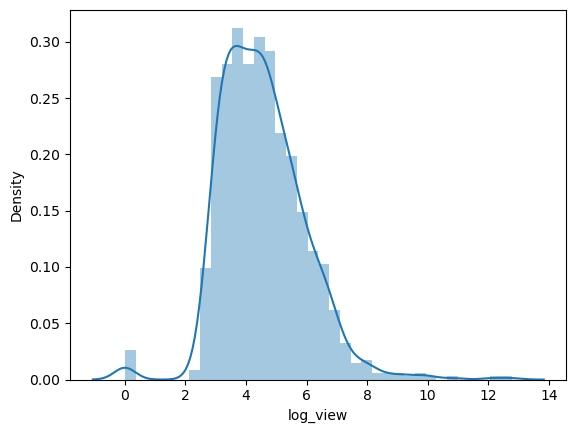

In [13]:
sns.distplot(view_per_ad['log_view'])

#### А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?



In [14]:
ads.date = pd.to_datetime(ads.date)

In [15]:


rolling2_mean_6th_april_2019 = ads.query("event == 'view'") \
                    .pivot_table(index = 'ad_id', 
                                 columns = 'date', 
                                 values = 'time', 
                                 aggfunc = 'count') \
                    .mean().rolling(2).mean()['2019-04-06']



print(f'Скользящее среднее показов с окном 2 за (6 апреля 2019):  \t {rolling2_mean_6th_april_2019}')


Скользящее среднее показов с окном 2 за (6 апреля 2019):  	 598.1162023460411


#### Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов

In [16]:
actual_mean = (
    ads.query("event == 'view'") \
    .pivot_table(index = 'ad_id', 
                 columns = 'date', 
                 values = 'time', 
                 aggfunc = 'count') \
    .mean().rename('mean')
)

rolling2_mean = (
    ads.query("event == 'view'") \
    .pivot_table(index = 'ad_id', 
                 columns = 'date', 
                 values = 'time', 
                 aggfunc = 'count') \
    .mean().rolling(2).mean() \
    .rename('rolling_mean')
)

<Axes: xlabel='date', ylabel='mean'>

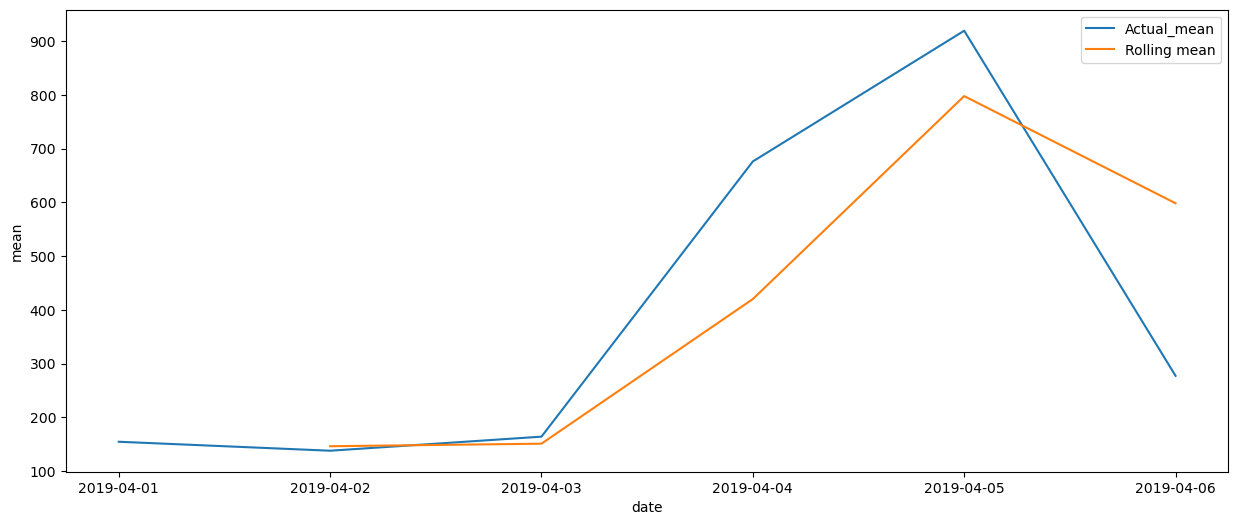

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15,6))
sns.lineplot(actual_mean, label = 'Actual_mean')
sns.lineplot(rolling2_mean, label = 'Rolling mean')


#### В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?

In [19]:
print(abs(actual_mean - rolling2_mean).idxmax())
print(abs(actual_mean - rolling2_mean).max())

2019-04-06 00:00:00
320.9934750733138


#### Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.

In [20]:
ad_per_date = ads.query("event == 'view'") \
                    .pivot_table(index = 'ad_id', 
                                 columns = 'date', 
                                 values = 'time', 
                                 aggfunc = 'count')

In [21]:
def finding_anomaly(ad_per_date):
    mean = ad_per_date.mean()
    
    rolling_mean = mean.rolling(2).mean()

    id_minmax = abs(mean - rolling_mean).idxmax()

    value_minmax = (mean - rolling_mean)[id_minmax]
    
    if value_minmax < 0:
        anomaly = ad_per_date[id_minmax].idxmax()

    else:
        anomaly = ad_per_date[id_minmax].idxmin()


    return anomaly

In [22]:
finding_anomaly(ad_per_date)

112583

#### Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.


In [23]:
ad_client = pd.read_csv('ads_clients_data.csv')
ad_client.head()

date  client_union_id  community_id create_date
0  2020-05-07                1    -130371893  2018-12-24
1  2020-05-07                2    -130304626  2019-02-10
2  2020-05-07                3    -130462599  2019-01-25
3  2020-05-07                4    -130574300  2018-12-09
4  2020-05-07                5    -130292358  2019-01-08

In [24]:
ads.head()

date                 time event platform   ad_id  client_union_id  \
0 2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01  2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

In [25]:
full_data = ads.merge(ad_client.drop(columns = ['date', 'community_id']), on = 'client_union_id')
full_data.head()

date                 time event platform   ad_id  client_union_id  \
0 2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01  2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  \
0              45061          CPM    200.6          0                1955269   
1             121288          CPM    187.4          0                 232011   
2             102564          CPC     60.7          0                   4410   
3             107564          CPM    217.3          0                  62711   
4               4400          CPC     60.1          0                1183501   

  create_date  
0  2018-12-04  
1  2018-12-25  
2  2018-11-13  
3  2018-08-18  
4  2019-02-22

In [26]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date                   1000000 non-null  datetime64[ns]
 1   time                   1000000 non-null  object        
 2   event                  1000000 non-null  object        
 3   platform               1000000 non-null  object        
 4   ad_id                  1000000 non-null  int64         
 5   client_union_id        1000000 non-null  int64         
 6   campaign_union_id      1000000 non-null  int64         
 7   ad_cost_type           1000000 non-null  object        
 8   ad_cost                1000000 non-null  float64       
 9   has_video              1000000 non-null  int64         
 10  target_audience_count  1000000 non-null  int64         
 11  create_date            1000000 non-null  object        
dtypes: datetime64[ns](1), float64

full_data['create_date'] = pd.to_datetime(full_data.create_date)

In [42]:
def diff(data):
    diff = data.date - data.create_date
    return diff.min()

In [43]:
difference = full_data.groupby('client_union_id') \
                         .apply(diff)
difference.mean()

Timedelta('124 days 09:04:43.532219570')

#### Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых.

In [53]:
days_365 = pd.Timedelta(365, unit = 'D')

difference = difference.loc[difference < days_365]

round(difference.shape[0] / ad_client.shape[0] * 100, 2)

0.69

#### Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования

In [70]:
intervals = pd.to_timedelta([0, 30, 60, 90, 120, 240, 365], unit = 'd')
labels = ['0-30 days', '30-60 days','60-90 days','90-120 days','120-240 days','240-365 days']

days_cutting = pd.cut(difference, bins = intervals, labels = labels)
days_cutting.value_counts()

120-240 days    397
90-120 days     149
60-90 days      138
30-60 days      125
240-365 days     18
0-30 days        11
Name: count, dtype: int64

#### А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

<Axes: ylabel='count'>

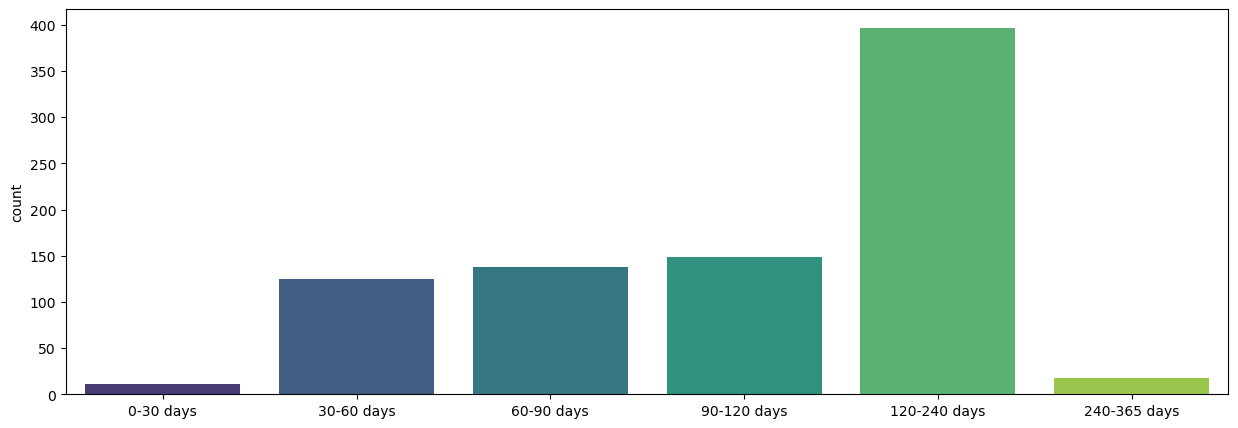

In [72]:
plt.figure(figsize = (15,5))
sns.barplot(data = days_cutting.value_counts(), palette = 'viridis') 

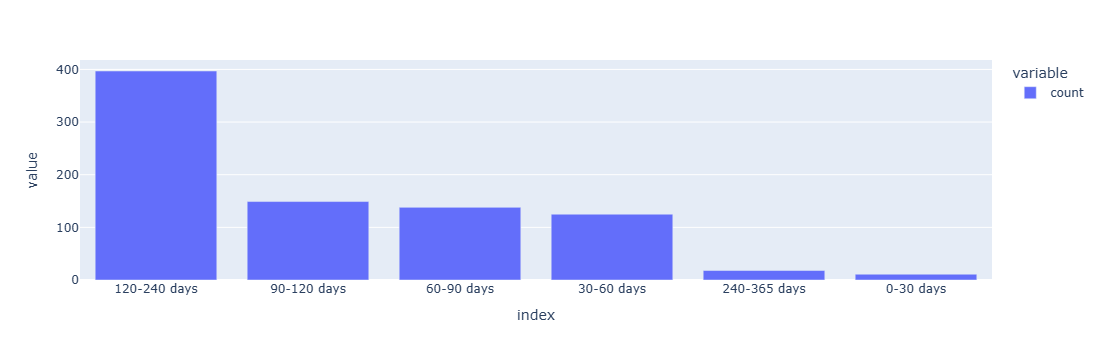

In [73]:
import plotly.express as px

px.bar(days_cutting.value_counts())

# 7 Assignments

In [79]:
import requests
from io import BytesIO

#### При помощи функции np.where создайте серию, в которую будет записываться 1, если посещения были сделаны роботами с браузера, содержащего Chrome в названии и 0, в других случаях. Поместите получившуюся серию в переменную chrome_robots



In [93]:
br = pd.read_csv('karpov_courses_test.csv')
br

date           browser user_type  users
0   2020-06-14     Google Chrome    People    139
1   2020-06-14     Chrome Mobile    People     35
2   2020-06-14     Google Chrome    Robots     28
3   2020-06-14    Yandex Browser    People     22
4   2020-06-14           Firefox    People     15
5   2020-06-14            Safari    People     13
6   2020-06-14           Firefox    Robots      8
7   2020-06-14   Android Browser    People      8
8   2020-06-14             Opera    People      5
9   2020-06-14     Mobile Safari    People      5
10  2020-06-14  Samsung Internet    People      5
11  2020-06-14            Safari    Robots      2
12  2020-06-14             UCWEB    Robots      2
13  2020-06-14              Edge    Robots      2
14  2020-06-14             Opera    Robots      1
15  2020-06-14             UCWEB    People      1
16  2020-06-14    Firefox Mobile    People      1
17  2020-06-14    Yandex Browser    Robots      1
18  2020-06-14   Android Browser    Robots      1
19  2020-06-14     Chrome Mobile    Robots      1
20  2020-06-14          Chromium    People      1
21  2020-06-14          Chromium    Robots      1
22  2020-06-14              Edge    People      1
23  2020-06-14            CocCoc    People      1

In [98]:
br['chrome_robots'] = np.where((br.browser.str.contains('Chrome')) & (br.user_type == 'Robots'),1,0)

In [99]:
br

date           browser user_type  users  chrome_robots
0   2020-06-14     Google Chrome    People    139              0
1   2020-06-14     Chrome Mobile    People     35              0
2   2020-06-14     Google Chrome    Robots     28              1
3   2020-06-14    Yandex Browser    People     22              0
4   2020-06-14           Firefox    People     15              0
5   2020-06-14            Safari    People     13              0
6   2020-06-14           Firefox    Robots      8              0
7   2020-06-14   Android Browser    People      8              0
8   2020-06-14             Opera    People      5              0
9   2020-06-14     Mobile Safari    People      5              0
10  2020-06-14  Samsung Internet    People      5              0
11  2020-06-14            Safari    Robots      2              0
12  2020-06-14             UCWEB    Robots      2              0
13  2020-06-14              Edge    Robots      2              0
14  2020-06-14             Opera    Robots      1              0
15  2020-06-14             UCWEB    People      1              0
16  2020-06-14    Firefox Mobile    People      1              0
17  2020-06-14    Yandex Browser    Robots      1              0
18  2020-06-14   Android Browser    Robots      1              0
19  2020-06-14     Chrome Mobile    Robots      1              1
20  2020-06-14          Chromium    People      1              0
21  2020-06-14          Chromium    Robots      1              0
22  2020-06-14              Edge    People      1              0
23  2020-06-14            CocCoc    People      1              0

#### У вас есть датасет sample_ads.csv с данными о кликах и показах по объявлению, в этом датасете есть пропуски. Вычислите количество строк без пропусков в колонке click_type. Запишите ответ в переменную not_nan_count


In [103]:
ads = pd.read_csv('sample_ads.csv')
ads

ad_id user_id click_type
0   12345   qwert        top
1   12345   fsssc     center
2   12345   vfvgg        NaN
3   12345   asrvv        NaN
4   12345   tynuy        top
5   12345   vreio        NaN
6   12345   oirbv        top
7   12345   kjvbe        NaN
8   12345   vkrej     center
9   12345   krjvb        top
10  12345   vrejn        top
11  12345   vrejk     center
12  12345   pirbv        NaN
13  12345    mpev        NaN
14  12345  pi3bvk        top
15  12345  osbvor     center
16  12345   vrbuo        NaN
17  12345   o3b0v        top

In [108]:
not_nan_count = (~ads.click_type.isna()).sum()
not_nan_count

11